In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from pathlib import Path

# Exploring traffic signals dataset

In [13]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,r'C:\Users\MANJU\Desktop\Traffic Project\GTSRB\Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


In [5]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
model = Sequential()

# BUILDING A CNN MODEL

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [8]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Train and validate the model

In [9]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 152s 151ms/step - loss: 2.0868 - accuracy: 0.4559 - val_loss: 0.7373 - val_accuracy: 0.8156
Epoch 2/15
981/981 [==============================] - 151s 154ms/step - loss: 0.8247 - accuracy: 0.7550 - val_loss: 0.2874 - val_accuracy: 0.9232
Epoch 3/15
981/981 [==============================] - 161s 164ms/step - loss: 0.5399 - accuracy: 0.8370 - val_loss: 0.1775 - val_accuracy: 0.9509
Epoch 4/15
981/981 [==============================] - 182s 186ms/step - loss: 0.4210 - accuracy: 0.8747 - val_loss: 0.1245 - val_accuracy: 0.9626
Epoch 5/15
981/981 [==============================] - 162s 165ms/step - loss: 0.3410 - accuracy: 0.8989 - val_loss: 0.0899 - val_accuracy: 0.9776
Epoch 6/15
981/981 [==============================] - 162s 165ms/step - loss: 0.2945 - accuracy: 0.9144 - val_loss: 0.0906 - val_accuracy: 0.9765
Epoch 7/15
981/981 [==============================] - 180s 184ms/step - loss: 0.2779 - accuracy: 0.9207 - val_loss: 0.0810 -

# Plotting graphs for accuracy 

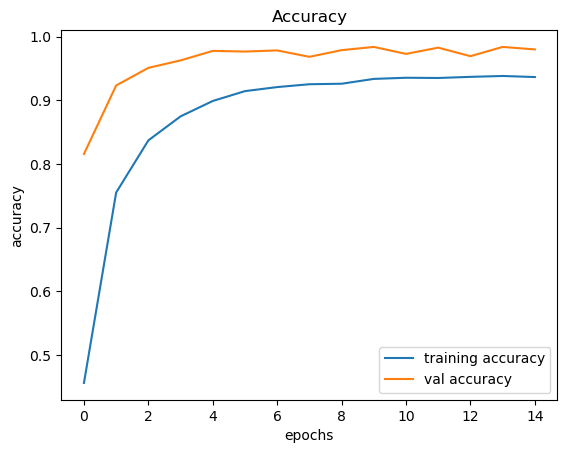

In [10]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

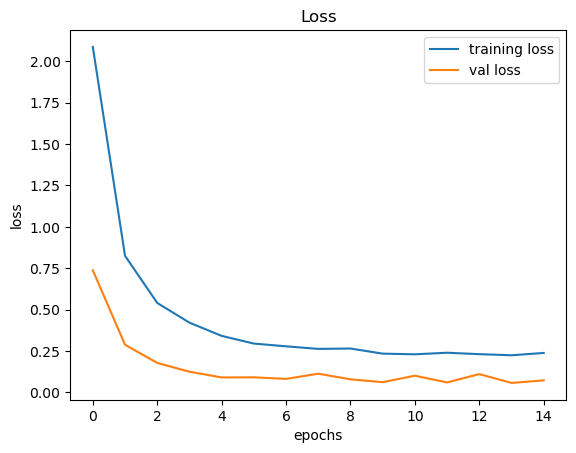

In [11]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing accuracy on test dataset

In [15]:
# Reading the CSV file with absolute paths
csv_path = r'C:\Users\MANJU\Desktop\Traffic Project\GTSRB\Test.csv'
y_test = pd.read_csv(csv_path)
# Getting the true class labels
labels = y_test["ClassId"].values
# Useing the 'Path' column to construct the absolute file paths
imgs = y_test["Path"].apply(lambda path: str(Path(csv_path).parent / path)).values
# Loading the images and preprocess them
data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))
X_test = np.array(data)

# Useing the predict method to get probabilities for each class
pred = model.predict(X_test)
# Converting probabilities to class labels using argmax
pred = np.argmax(pred, axis=1)
# Calculating accuracy with the test data
accuracy = accuracy_score(labels, pred)
print("Accuracy:", accuracy)


395/395 [==============================] - 13s 32ms/step
Accuracy: 0.9431512272367379


# Saving the model in Traffic Project directory

In [17]:
model.save(r"C:\Users\MANJU\Desktop\Traffic Project\traffic_classifier.h5")